In [ ]:
 Normalization =>
                 Normalization  its a important step in machine learning and data preprocessing .
                 In this case numerical features to change intp common scale and to select range differences  and  distort. 
                 It also insure that  feature did not  scale to dominate.
                 Normalization kaafi machine learning algorithms, jaise distance-based algorithms (e.g., KNN) aur gradient descent optimization ke liye zaroori hota hai.

In [ ]:
Types of Normalizations =>
Min-Max Scaling (Normalization):
                              Min-Max Scaling its fit data into specific range, usually 0 aur 1 

Mean Absolute Scaling (Normalization) :=>
                                        Mean absolute scalling its also part Nornalization and its work like function

<Axes: ylabel='Density'>

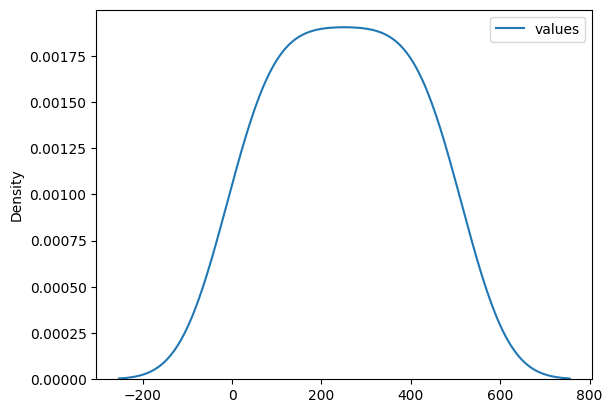

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
import seaborn as sns
d = np.linspace(2,500,20)
df = pd.DataFrame(d,columns=["values"])
df.mean()          # values    251.0   dtype: float64
sns.kdeplot(df)

In [6]:
# use train split for test and train data
X_train,X_test = train_test_split(df,test_size=0.4,random_state=30)
X_train.head()

,values
16,421.368421
3,80.631579
1,28.210526
18,473.789474
2,54.421053


In [7]:
"""  use MinMaxScaler for data """
sc = MinMaxScaler()
sc.fit(X_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


<Axes: ylabel='Density'>

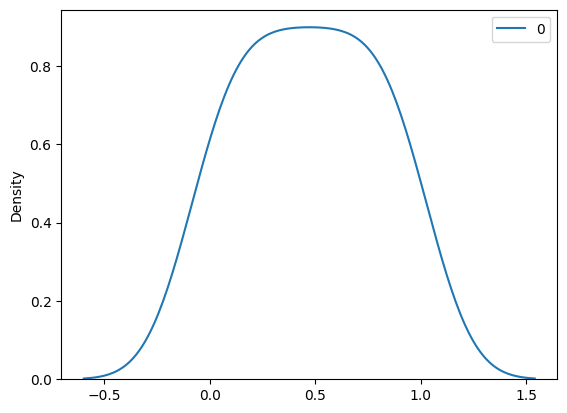

In [9]:
""" Know we use scaler to transform the data """
scaler = sc.transform(df)
scaler
sns.kdeplot(scaler)   # we change values and thier range successfully to convert into 0 to 1

In [14]:
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=["values"])
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=["values"])
print("Original Training Data:\n", X_train.head())
print("Scaled Training Data:\n", X_train_scaled_df.head())
print("Original Testing Data:\n", X_test.head())
print("Scaled Testing Data:\n", X_test_scaled_df.head())

Original Training Data:
         values
16  421.368421
3    80.631579
1    28.210526
18  473.789474
2    54.421053
Scaled Training Data:
      values
0  0.833333
1  0.111111
2  0.000000
3  0.944444
4  0.055556
Original Testing Data:
         values
11  290.315789
0     2.000000
15  395.157895
14  368.947368
9   237.894737
Scaled Testing Data:
      values
0  0.555556
1 -0.055556
2  0.777778
3  0.722222
4  0.444444


In [5]:

""" Mean Absolute Scaling (Normalization) """
# Generate the values
values = np.linspace(2, 100, 30)

# Create a DataFrame
df1 = pd.DataFrame(values, columns=["values"])
df1

,values
0,2.000000
1,5.379310
2,8.758621
3,12.137931
4,15.517241
5,18.896552
6,22.275862
7,25.655172
8,29.034483
9,32.413793


In [8]:
# Define the mean absolute scaling function
def mean_absolute_scaling(series):
    mean_abs = series.abs().mean()
    return series / mean_abs
    
df1['normalized_values'] = mean_absolute_scaling(df1['values'])
df1

,values,normalized_values
0,2.000000,0.039216
1,5.379310,0.105477
2,8.758621,0.171738
3,12.137931,0.237999
4,15.517241,0.304260
5,18.896552,0.370521
6,22.275862,0.436782
7,25.655172,0.503043
8,29.034483,0.569304
9,32.413793,0.635565


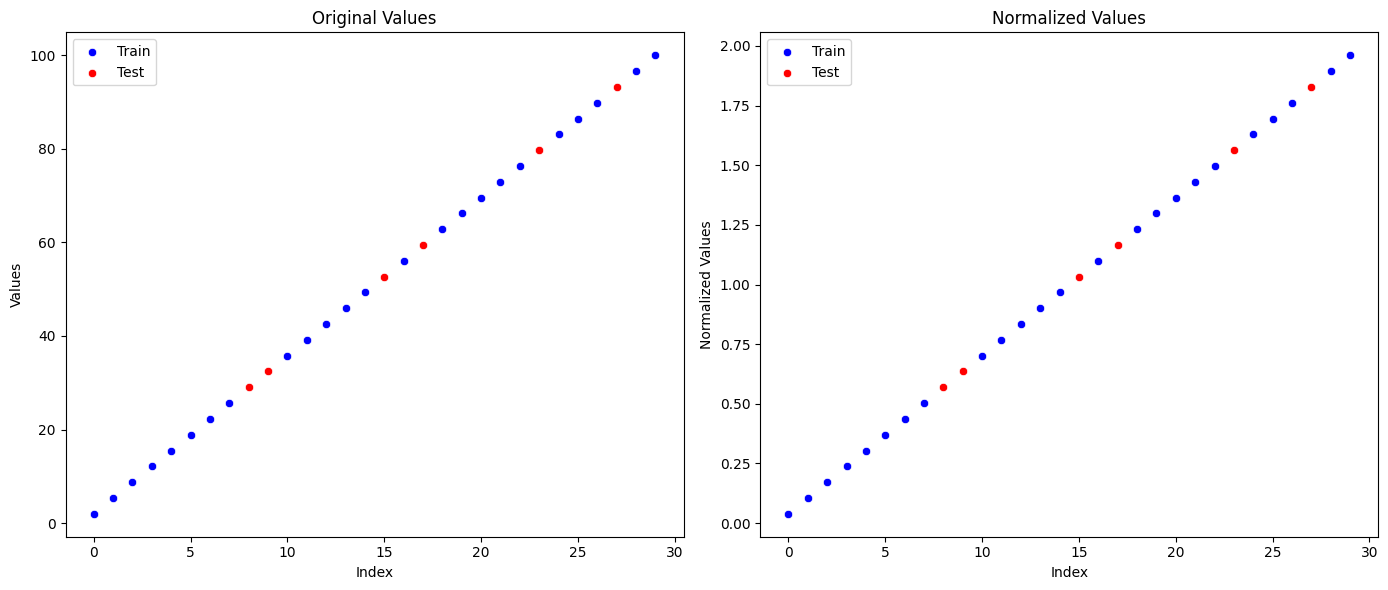

In [13]:
import  matplotlib.pyplot as  plt
# Split the data into training and testing sets
train_df, test_df = train_test_split(df1, test_size=0.2, random_state=42)
# Plotting the original and normalized values
plt.figure(figsize=(14, 6))

# Plot original values
plt.subplot(1, 2, 1)
sns.scatterplot(x=train_df.index, y=train_df['values'], label='Train', color='blue')
sns.scatterplot(x=test_df.index, y=test_df['values'], label='Test', color='red')
plt.title('Original Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()

# Plot normalized values
plt.subplot(1, 2, 2)
sns.scatterplot(x=train_df.index, y=train_df['normalized_values'], label='Train', color='blue')
sns.scatterplot(x=test_df.index, y=test_df['normalized_values'], label='Test', color='red')
plt.title('Normalized Values')
plt.xlabel('Index')
plt.ylabel('Normalized Values')
plt.legend()

plt.tight_layout()
plt.show()